In [62]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Step 1: Read the CSV file
file_path = '/content/drive/My Drive/abc/data.csv'
df = pd.read_csv(file_path)

# Use the correct column name to drop (e.g., 'id' if the column name is 'id')
df = df.drop('id', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Check for null values in the DataFrame
print(df.isnull().sum())

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


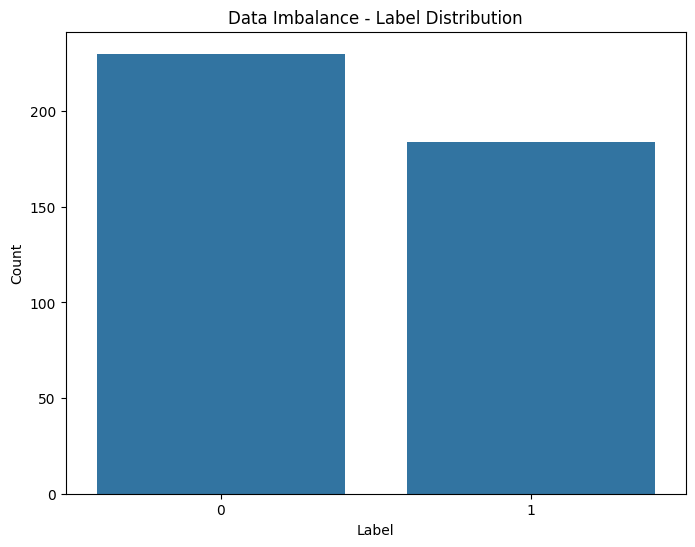

target
0    230
1    184
Name: count, dtype: int64


In [21]:
# prompt: Plot the based on the values for the label to view the data imbalance

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'target' is the column containing the target variable
label_counts = df['target'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df) # Changed 'label' to 'target'
plt.title('Data Imbalance - Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

print(label_counts)

In [63]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to scale
numerical_cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

from sklearn.model_selection import train_test_split

# Step 4: Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

def create_transformer_model(input_dim):
    inputs = keras.Input(shape=(input_dim,))

    # Reshape input to add sequence dimension (assuming single sequence step)
    x = layers.Reshape((1, input_dim))(inputs)

    # Transformer Block 1
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Transformer Block 2
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Flatten the sequence dimension for the output layer
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # For binary classification

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [65]:
y_train = y_train.to_numpy().reshape(-1, 1)
input_dim = X_train.shape[1]

model = create_transformer_model(input_dim)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

# Classification Report
print(classification_report(y_test, y_pred_classes))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7210 - loss: 0.5757
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        45
           1       0.77      0.71      0.74        38

    accuracy                           0.77        83
   macro avg       0.77      0.77      0.77        83
weighted avg       0.77      0.77      0.77        83



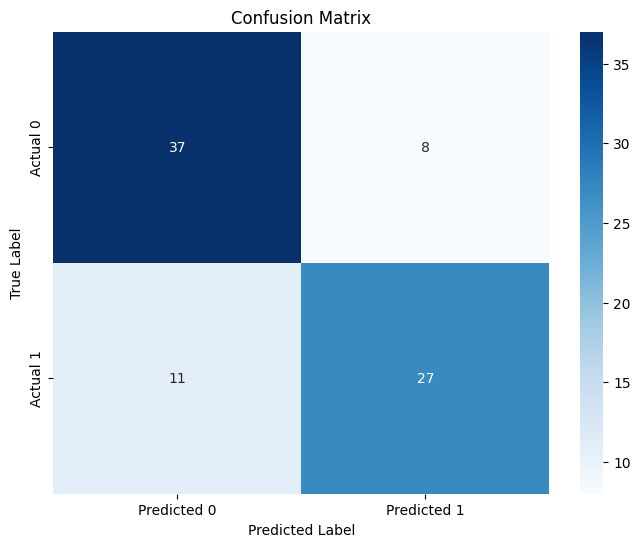

In [69]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [5]:
import pandas as pd

from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/abc/data.csv'

# Select the numerical columns to scale
numerical_cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*XGBoost Model*

In [2]:
from xgboost import XGBClassifier


df = pd.read_csv(file_path)

# Use the correct column name to drop (e.g., 'id' if the column name is 'id')
df = df.drop('id', axis=1)

scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Display results
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Classification Report:\n", classification_report_xgb)

Mounted at /content/drive
XGBoost Accuracy: 0.70
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        45
           1       0.67      0.68      0.68        38

    accuracy                           0.70        83
   macro avg       0.70      0.70      0.70        83
weighted avg       0.70      0.70      0.70        83



SVC Model

In [6]:
from sklearn.svm import SVC

df = pd.read_csv(file_path)

# Use the correct column name to drop (e.g., 'id' if the column name is 'id')
df = df.drop('id', axis=1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 4: Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Display results
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:\n", classification_report_svm)

SVM Accuracy: 0.77
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80        45
           1       0.77      0.71      0.74        38

    accuracy                           0.77        83
   macro avg       0.77      0.77      0.77        83
weighted avg       0.77      0.77      0.77        83



Naive Bayes classifier

In [7]:
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv(file_path)

# Use the correct column name to drop (e.g., 'id' if the column name is 'id')
df = df.drop('id', axis=1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 4: Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

# Display results
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("Naive Bayes Classification Report:\n", classification_report_nb)

Naive Bayes Accuracy: 0.81
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        45
           1       0.79      0.79      0.79        38

    accuracy                           0.81        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.81      0.81      0.81        83



RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(file_path)

# Use the correct column name to drop (e.g., 'id' if the column name is 'id')
df = df.drop('id', axis=1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 4: Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        45
           1       0.73      0.63      0.68        38

    accuracy                           0.72        83
   macro avg       0.72      0.72      0.72        83
weighted avg       0.72      0.72      0.72        83



Feed Forward Neural Network

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5772 - loss: 0.6909
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.6320 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 0.6274 


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.6036 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.5858  
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7131 - loss: 0.5746  
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7235 - loss: 0.5820 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.5530 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7390 - loss: 0.5767  
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.5567  
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7399 - loss: 0.5568  
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7459 - loss: 0.5613 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 0.5762 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7310 - loss: 0.5599 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7151 - loss: 0.6015  
Neural Network Accuracy: 0.73


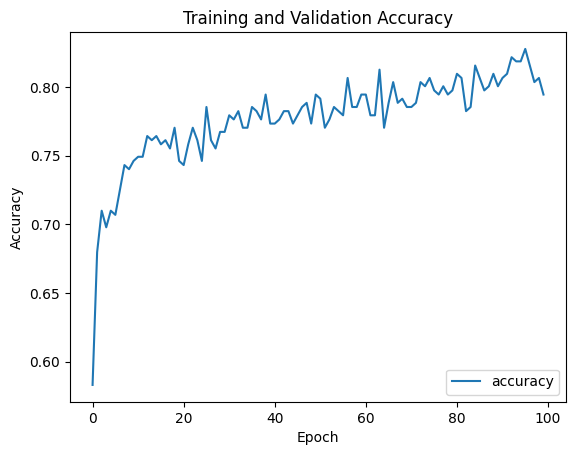

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77        45
           1       0.74      0.66      0.69        38

    accuracy                           0.73        83
   macro avg       0.73      0.73      0.73        83
weighted avg       0.73      0.73      0.73        83



In [18]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the model with dropouts
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Add dropout layer with a dropout rate of 0.2
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Add dropout layer with a dropout rate of 0.2
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
classification_report_str = classification_report(y_test, y_pred_classes)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)